# Task 1: Classification

- Create a Neural Network model
- Define optimization procedure
- Train Classifier
- Evaluate model on test set

In [73]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt
import numpy as np
from utils import NoisyFashionMNIST
from torch.autograd import Variable

%matplotlib inline
def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

## Dataset

In [87]:
transform=transforms.Compose([
        transforms.ToTensor(),])

train_dataset = datasets.FashionMNIST("./data", train = True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST("./data", train = False, download=True, transform=transform)


idx_to_class = {v: k for k, v in train_dataset.class_to_idx.items()}
print(idx_to_class)

{0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}


In [88]:
x,y = train_dataset[1]
idx_to_class[y]
print(train_dataset[0][0].shape)
print(np.transpose(train_dataset[0][0], (1,2,0)).shape)

torch.Size([1, 28, 28])
torch.Size([28, 28, 1])


['Ankle boot', 'T-shirt/top', 'T-shirt/top', 'Dress', 'T-shirt/top', 'Pullover', 'Sneaker', 'Pullover', 'Sandal', 'Sandal']


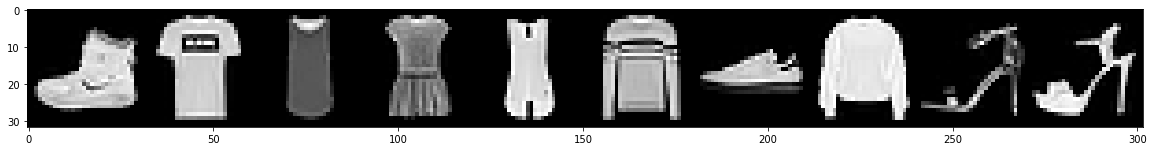

In [89]:
x = [train_dataset[i][0] for i in range(10)]
labels = [idx_to_class[train_dataset[i][1]] for i in range(10)]
print(labels)

plt.figure(figsize=(20,10))
show(torchvision.utils.make_grid(x, nrow=10))
plt.show()

In [91]:
# prepare data
# validation set

#index = list(range(len(train_dataset)))
#np.random.shuffle(index)
#split = int(0.2*len(train_dataset))

#rain = SubsetRandomSampler(index[:split])
#alid =  SubsetRandomSampler(index[split:])

batch_size =64
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size=batch_size)
#alidation_loader = torch.utils.data.DataLoader(dataset = train_dataset, sampler = valid, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size=batch_size, shuffle = True)


In [92]:
class FashionCNN(nn.Module):
    def __init__(self):
        super(FashionCNN, self).__init__()
        self.l1 = nn.Linear(784,256)
        self.l2 = nn.Linear(256,128)
        self.l3 = nn.Linear(128,64)
        self.l4 = nn.Linear(64,10)
        self.dropout = nn.Dropout(0.2)
        
        
    def forward(self, x):
        out = x.view(x.shape[0],-1)
        out = self.dropout(F.relu(self.l1(out)))
        out = self.dropout(F.relu(self.l2(out)))
        out = self.dropout(F.relu(self.l3(out)))
        out = F.log_softmax(self.l4(out), dim=1)
        
        return out
      

In [93]:
model = FashionCNN()
#model.to(device)

criterion = nn.CrossEntropyLoss()

learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
print(model)

FashionCNN(
  (l1): Linear(in_features=784, out_features=256, bias=True)
  (l2): Linear(in_features=256, out_features=128, bias=True)
  (l3): Linear(in_features=128, out_features=64, bias=True)
  (l4): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [95]:
num_epochs = 5
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        #images = images.reshape(100,1, 28,28)#.to(device)
        #labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}') 


# Test the model

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        #images = images.reshape(100,1, 28,28)#.to(device)
        #labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

Epoch [1/5], Step [100/938], Loss: 0.4060
Epoch [1/5], Step [200/938], Loss: 0.3751
Epoch [1/5], Step [300/938], Loss: 0.3384
Epoch [1/5], Step [400/938], Loss: 0.6239
Epoch [1/5], Step [500/938], Loss: 0.2683
Epoch [1/5], Step [600/938], Loss: 0.3115
Epoch [1/5], Step [700/938], Loss: 0.5807
Epoch [1/5], Step [800/938], Loss: 0.4161
Epoch [1/5], Step [900/938], Loss: 0.3283
Epoch [2/5], Step [100/938], Loss: 0.3730
Epoch [2/5], Step [200/938], Loss: 0.4004
Epoch [2/5], Step [300/938], Loss: 0.2996
Epoch [2/5], Step [400/938], Loss: 0.6315
Epoch [2/5], Step [500/938], Loss: 0.2129
Epoch [2/5], Step [600/938], Loss: 0.3020
Epoch [2/5], Step [700/938], Loss: 0.5633
Epoch [2/5], Step [800/938], Loss: 0.3679
Epoch [2/5], Step [900/938], Loss: 0.2707
Epoch [3/5], Step [100/938], Loss: 0.4053
Epoch [3/5], Step [200/938], Loss: 0.2777
Epoch [3/5], Step [300/938], Loss: 0.2855
Epoch [3/5], Step [400/938], Loss: 0.5358
Epoch [3/5], Step [500/938], Loss: 0.2199
Epoch [3/5], Step [600/938], Loss:

# Task 2: Train Autoencoder
- Create a Neural Network model
- Define optimization procedure
- Train Classifier
- Evaluate model on test set

In [47]:
train_dataset = NoisyFashionMNIST("./data", True)
test_dataset = NoisyFashionMNIST("./data", False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


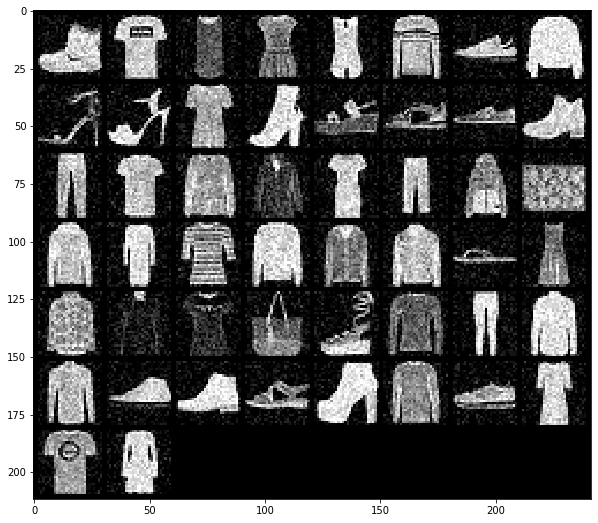

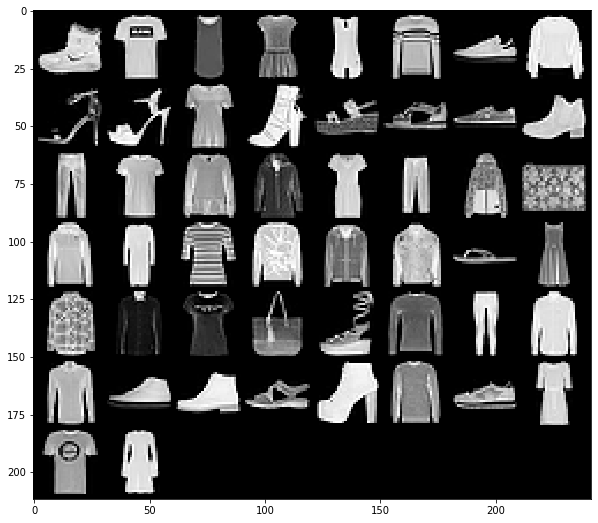

In [48]:
x = [train_dataset[i][0] for i in range(50)]
y = [train_dataset[i][1] for i in range(50)]

plt.figure(figsize=(10,10))
show(torchvision.utils.make_grid(x))
plt.show()

plt.figure(figsize=(10,10))
show(torchvision.utils.make_grid(y))
plt.show()